# What is regression?

Regression is a simple, common, and highly useful data analysis technique, often colloquially referred to as "fitting a line." In its simplest form, regression fits a straight line between a one variable (feature) and another (label). In more complicated forms, regression can find non-linear relationships between a single label and multiple features.

## Simple linear regression
Simple linear regression models a linear relationship between a single feature and a usually continuous label, allowing the feature to predict the label. Visually, it might look something like this:

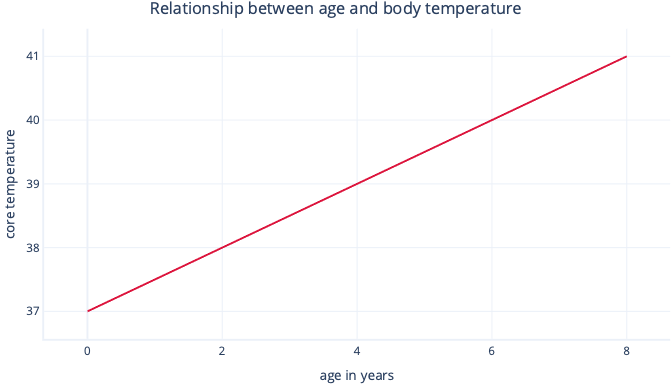

Simple linear regression has two parameters: an intercept ($c$), which indicates the value that the label is when the feature is set to zero; and a slope ($m$), which indicates how much the label will increase for each one-point increase in the feature.

If you like to think mathematically, this is simply:

$y=mx+c$

Where $y$ is your label and $x$ is your feature.

For example, in our scenario, if we were to try to predict which patients will have a fever-elevated body temperature-based on their age, we would have the model:

$\text{temperature}=m*\text{age}+c$

And need to find the values of $m$ and $c$ during the fitting procedure. If we found $m = 0.5$ and $c = 37$, we might visualize it like this:

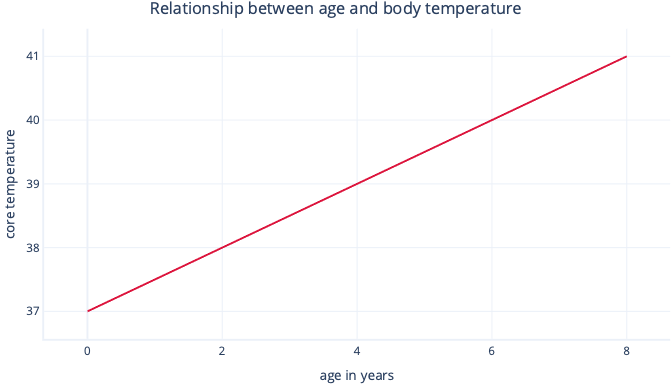

## Fitting linear regression
We normally use existing libraries to fit regression models for us. Regression typically aims to find the line that produces the least amount of error, where error here means the difference between the actual data-point value and the predicted value. For example, in the following image, the black line indicates the error between the prediction, the red line, and one actual value: the dot.

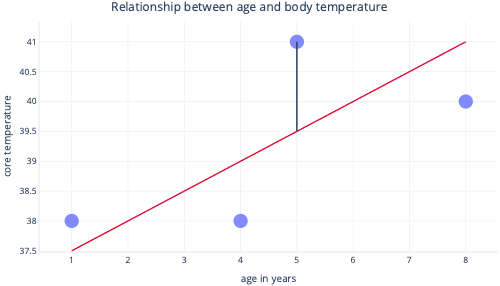

So, the model was wrong by 1.5 for this datapoint.

Most commonly, we fit a model by minimizing the residual sum of squares. This means that the cost function is calculated like so:

1. Calculate the difference between the actual and predicted values (as previously) for each data point.
2. Square these values.
3. Sum (or average) these squared values.

This squaring step means that not all points contribute evenly to the line: outliers—which are points that don't fall in the expected pattern—have disproportionately larger error, which can influence the position of the line.

## Strengths of regression
Regression techniques have many strengths that more complex models don't.

### Predictable and easy to interpret
Regressions are easy to interpret because they describe simple mathematical equations, which we can often graph. More complex models are often referred to as black box solutions, because it's difficult to understand how they make predictions or how they'll behave with certain inputs.

### Easy to extrapolate
Regressions make it easy to extrapolate; to make predictions for values outside the range of our dataset. For example, it's simple to estimate in our previous example that a nine year-old dog will have a temperature of 40.5°C. You should always apply caution to extrapolation: this model would predict that a 90 year-old would have a temperature nearly hot enough to boil water.

### Optimal fitting is usually guaranteed
Most machine learning models use gradient descent to fit models, which involves tuning the gradient descent algorithm and provides no guarantee that an optimal solution will be found. By contrast, linear regression that uses the sum of squares as a cost function doesn't actually need an iterative gradient-descent procedure. Instead, clever mathematics can be used to calculate the optimal location for the line to be placed. The mathematics are outside the scope of this module, but it's useful to know that (so long as the sample size isn't too large) linear regression doesn't need special attention to be paid to the fitting process, and the optimal solution is guaranteed.

# Multiple linear regression and R-squared

## Multiple linear regression
Multiple linear regression models the relationship between several features and a single variable. Mathematically, it's the same as simple linear regression, and is usually fit using the same cost function, but with more features.

Rather than modeling a single relationship, this technique simultaneously models multiple relationships, which it treats as independent of one another. For example, if we're predicting how ill a dog becomes based on their age and *body_fat_percentage*, two relationships are found:

- How age increases or decreases illness
- How body_fat_percentage increases or decreases illness

If we're only working with two features, we can visualize our model as a plane—a flat 2D surface—just like we can model simple linear regression as a line. We'll explore this in the next exercise.



## Multiple linear regression has assumptions
The fact that the model expects features to be independent is called a model assumption. When model assumptions aren't true, the model can make misleading predictions.

For example, age probably predicts how sick dogs become, as older dogs get more sick, along with whether dogs have been taught how to play frisbee; older dogs probably all know how to play frisbee. If we included *age* and *knows_frisbee* to our model as features, it would likely tell us knows_frisbee is a good predictor of an illness and underestimate the importance of age. This is a bit absurd, because knowing frisbee isn't likely to cause disease. By contrast, *dog_breed* might also be a good predictor of illness, but there's no reason to believe age predicts dog_breed, so it would be safe to include both in a model.



## Goodness of fit: $R^2$ (Coefficient of determination)

$$
\begin{align}
R^2 
& = 1 - \frac{\text{RSS}}{\text{TSS}} \\
& = 1 - \frac{\sum^n_{i=1}(y_i-f(x_i))^2}{\sum^n_{i=1}(y_i-\bar{y})^2}
\end{align}
$$

$RSS$ = Residual Sum of Squares \
$TSS$ = Total Sum of Squares \
$y_i$ = $i$-th value of the variable to be predicted \
$\bar{y}$ = mean value of a sample \
$f(x_i)$ = predicted value of $y_i$ \
$n$ = upper limit of summation \

We know that cost functions can be used to assess how well a model fits the data on which it's trained. Linear regression models have a special related measure called $R^2$ (R-squared). $R^2$ is a value between 0 and 1 that tells us how well a linear regression model fits the data. When people talk about correlations being strong, they often mean that the $R^2$ value was large.

$R^2$ uses mathematics beyond what we intend to cover in this course, but we can think of it intuitively. Let's consider the previous exercise, where we looked at the relationship between *age* and *core_temperature*. An $R^2$ of 1 would mean years could be used to perfectly predict who had a high temperature and who had a low temperature. By contrast, a 0 would mean there was simply no relationship between years and temperature.



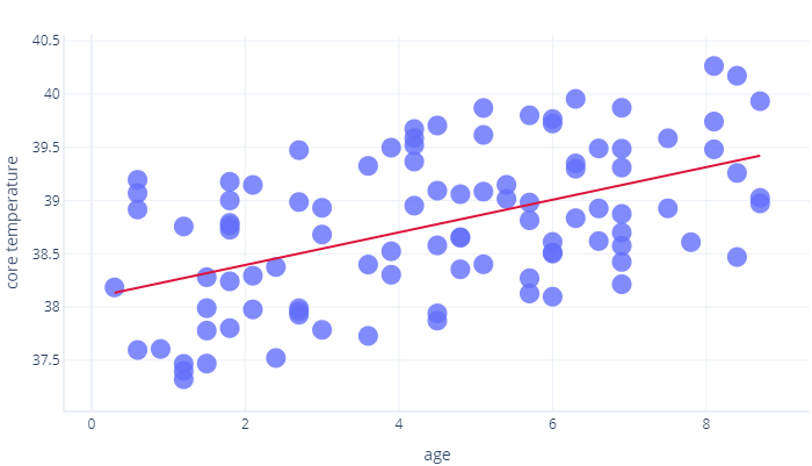

The reality is somewhere in between. Our model could predict temperature to some degree (so it's better than $R^2 = 0$), but points varied from this prediction somewhat (so it's less than $R^2=1$).

$R^2$ is only half the story.

$R^2$ values are widely accepted, but aren't a perfect measure we can use in isolation. They suffer four limitations:

- Because of how $R^2$ is calculated, the more samples we have, the higher the $R^2$. This can lead us to thinking that one model is better than another (identical) model, simply because $R^2$ values were calculated using different amounts of data.
- $R^2$ values don't tell us how well a model will work with new, previously unseen data. Statisticians overcome this by calculating a supplementary measure, called a *p-value*, which we won't cover here. In machine learning, we often explicitly test our model on another dataset instead.
- $R^2$ values don't tell us the direction of the relationship. For example, an $R^2$ value of 0.8 doesn't tell us whether the line is sloped upwards or downwards. It also doesn’t tell us how sloped the line is.
- 
It's also worth keeping in mind that there’s no universal criteria for what makes an $R^2$ value "good enough." For example, in most of physics, correlations that aren't very close to 1 are unlikely to be considered useful, but when modeling complex systems, $R^2$ values as low as 0.3 might be considered to be excellent.

